### Import the Libraries

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

2023-12-27 12:38:12.160692: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 12:38:12.162975: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 12:38:12.210922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 12:38:12.211966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 12:38:13.287944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Create the image data generator object to read images

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

### Read the image

In [3]:
# multiclass change class_mode='binary'->'categorical' 
# And also change the no of neurons in last layer
train=train_datagen.flow_from_directory('imagenet1/train',class_mode='categorical',batch_size=32,target_size=(64,64))

Found 5000 images belonging to 10 classes.


In [4]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

In [5]:
train.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

In [6]:
def build_cnn(input_shape=(64,64,3),num_classes=10):
    '''Define a cnn model with the specified input shape and number of classes'''
    model=Sequential()
    
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
    model.add(Dense(num_classes,activation='softmax'))
    return model

In [7]:
model= build_cnn()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                1

In [9]:
from keras.utils import plot_model

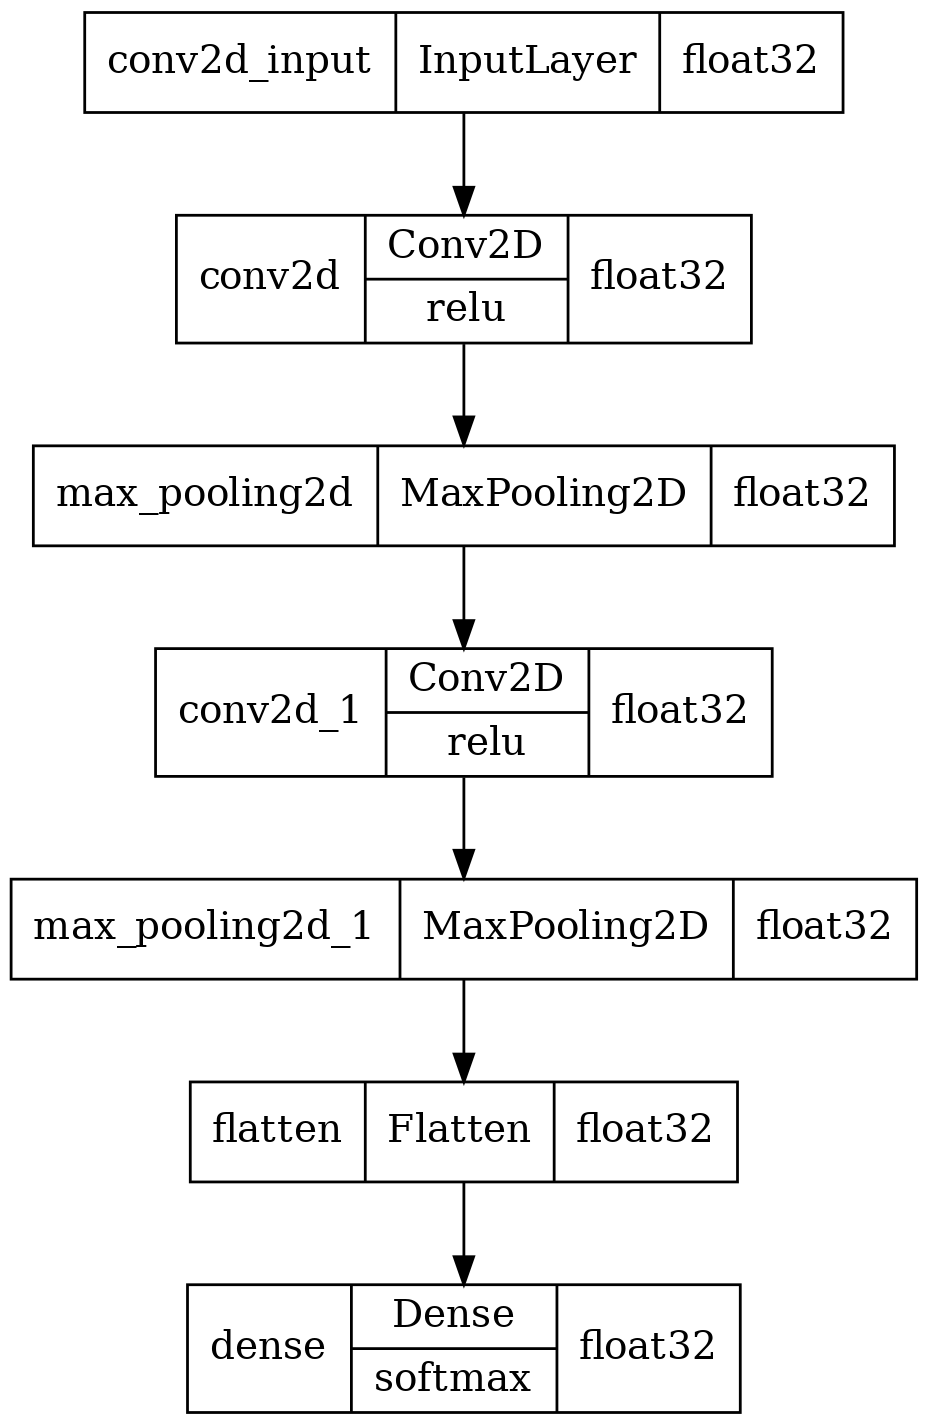

In [10]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True, dpi=200)

### Compile model

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train,epochs=25,batch_size=50)

Epoch 1/25


2023-12-27 12:38:15.943464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


157/157 [==============================] - 11s 63ms/step - loss: 1.9998 - accuracy: 0.2912
Epoch 2/25
157/157 [==============================] - 10s 63ms/step - loss: 1.6746 - accuracy: 0.4260
Epoch 3/25
157/157 [==============================] - 10s 63ms/step - loss: 1.5502 - accuracy: 0.4750
Epoch 4/25
157/157 [==============================] - 10s 64ms/step - loss: 1.4222 - accuracy: 0.5212
Epoch 5/25
157/157 [==============================] - 10s 63ms/step - loss: 1.3669 - accuracy: 0.5362
Epoch 6/25
157/157 [==============================] - 10s 63ms/step - loss: 1.2977 - accuracy: 0.5662
Epoch 7/25
157/157 [==============================] - 10s 63ms/step - loss: 1.2845 - accuracy: 0.5716
Epoch 8/25
157/157 [==============================] - 10s 63ms/step - loss: 1.2024 - accuracy: 0.6036
Epoch 9/25
157/157 [==============================] - 10s 62ms/step - loss: 1.1799 - accuracy: 0.6018
Epoch 10/25
157/157 [==============================] - 10s 63ms/step - loss: 1.1485 - accurac

In [13]:
import matplotlib.pyplot as plt

In [14]:
new= plt.imread('imagenet1/test/images/test_50.JPEG')

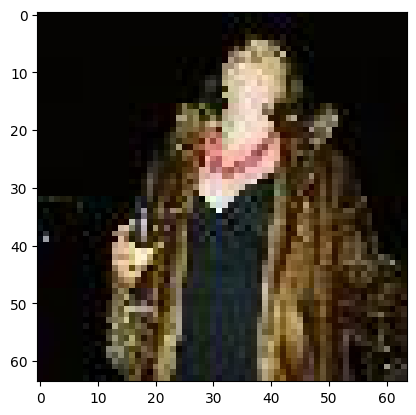

In [15]:
plt.imshow(new)

In [16]:
new_img= np.array(new)
new_img.shape

(64, 64, 3)

In [17]:
lables=list(train.class_indices.keys())

In [18]:
pred=model.predict(new_img.reshape(1,64,64,3))
a=np.argmax(pred)
print(lables[a])

1/1 [==============================] - 0s 99ms/step
snake


In [19]:
import os

1/1 [==============================] - 0s 20ms/step


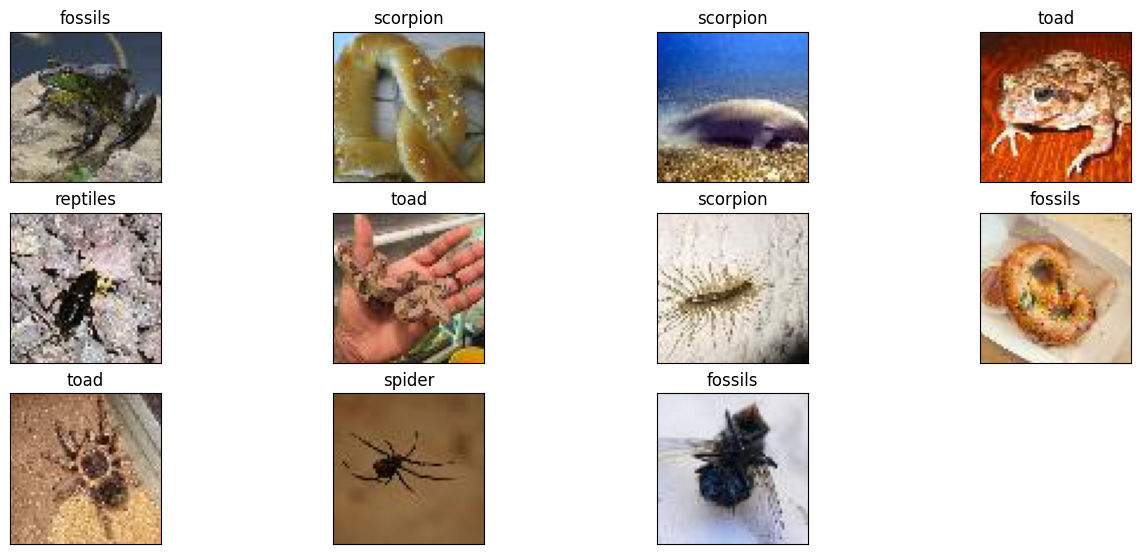

In [20]:
plt.figure(figsize=(16,9))
folder_path ='imagenet1/sample'
image_filenames=[img for img in os.listdir(folder_path)]
i=1
for img_filename in image_filenames:
    imga_path = os.path.join(folder_path,img_filename)
    img=plt.imread(imga_path)
    plt.subplot(4,4,i)
    plt.xticks([]);plt.yticks([])
    plt.imshow(img)
    
    img_arr= np.array(img)
    pred=model.predict(img_arr.reshape(1,64,64,3))
    a=np.argmax(pred)
    plt.title(lables[a])
    i+=1